In [1]:
%matplotlib inline

Generate cropped images from spots
==================================

This example shows how to use
`squidpy.im.ImageContainer.generate_spot_crops`.

High-resolution tissue slides might be too large to fit in the memory.
Therefore, we use a generator that produces cropped images from the
original image container object.
`squidpy.im.ImageContainer.generate_spot_crops` iterates over
`anndata.AnnData.obsm` and extracts crops.

For Z-stacks, the specified `library_id` or list of `library_id` need to
match the name of the Z-dimension. Always extracts 2D crops from the
specified Z-dimension.

::: {seealso}

    - {doc}`compute_crops` 
    - {doc}`compute_process_hires` 
    - {doc}`compute_gray`
:::


In [3]:
import matplotlib.pyplot as plt

import squidpy as sq

First, we load the H&E stained tissue image. Here, we only load a
cropped dataset to speed things up. In general,
`squidpy.im.ImageContainer.generate_spot_crops` can also process very
large images. See
{doc}`compute_process_hires`. Second, we load
the related anndata for the H&E stained tissue image.


In [4]:
img = sq.datasets.visium_hne_image_crop()
adata = sq.datasets.visium_hne_adata_crop()

Next, we use `squidpy.im.ImageContainer.generate_spot_crops` to make a
generator that generates cropped images. The argument `as_array` specify
the type in which the crop is returned. If we pass a specific layer in
the `squidpy.im.ImageContainer` then it will return a plain
`numpy.ndarray`. Check the documentation of the method
`squidpy.im.ImageContainer.generate_spot_crops`.


In [5]:
gen = img.generate_spot_crops(adata, scale=0.5, as_array="image", squeeze=True)

When called, the `next(gen)` produces consecutive cropped images each
time. Let\'s plot the cropped images using matplotlib.


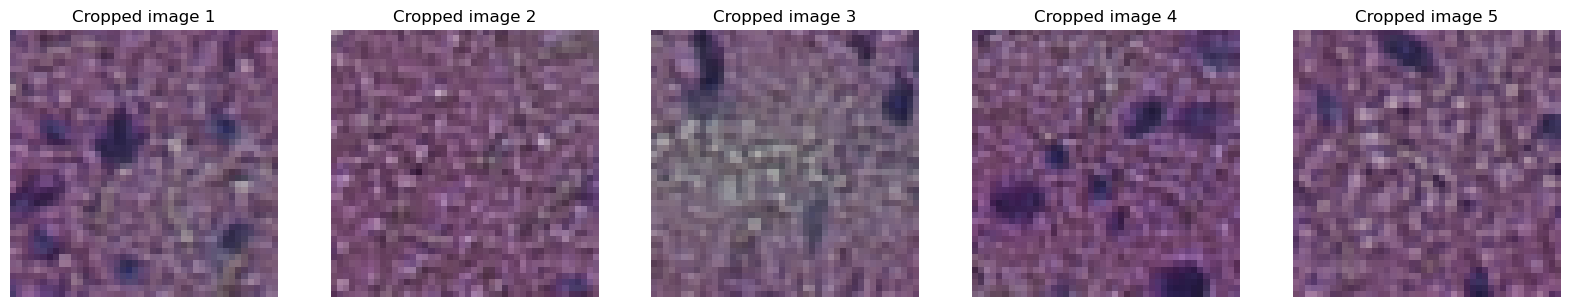

In [6]:
fig, axes = plt.subplots(1, 5)
fig.set_size_inches((20, 6))
for i in range(5):
    axes[i].set_title(f"Cropped image {i+1}")
    axes[i].axis("off")
    axes[i].imshow(next(gen))

We will now see how the cropped images differ with change in
`spot_size`. `scale = 1` would crop the spot with exact diameter size.
You can crop larger area by increasing the `scale`. To illustrate this,
we change the spot\_size and plot the images again by looping on
`next(gen)`.


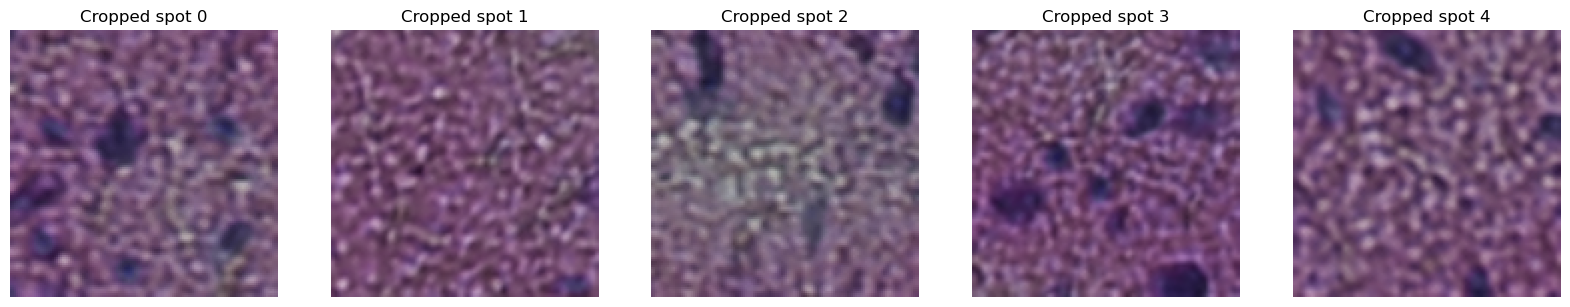

In [7]:
gen = img.generate_spot_crops(adata, scale=1.5, as_array="image", squeeze=True)
fig, axes = plt.subplots(1, 5)
fig.set_size_inches((20, 6))
for i in range(5):
    axes[i].set_title(f"Cropped spot {i}")
    axes[i].axis("off")
    axes[i].imshow(next(gen))

We can see the increase in the context with increase in the `spot_size`.


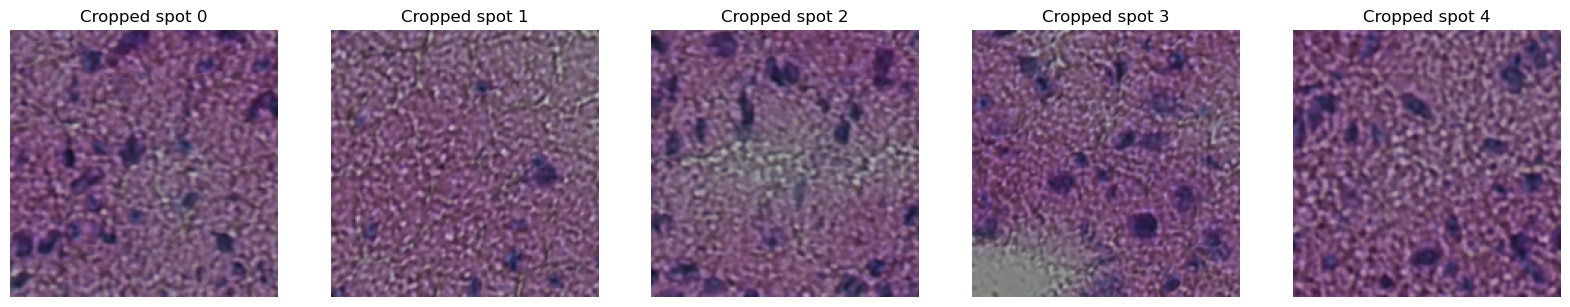

In [8]:
gen = img.generate_spot_crops(adata, spot_scale=2, as_array="image", squeeze=True)
fig, axes = plt.subplots(1, 5)
fig.set_size_inches((20, 6))
for i in range(5):
    axes[i].set_title(f"Cropped spot {i}")
    axes[i].axis("off")
    axes[i].imshow(next(gen))

Argument `as_array` also takes boolean `True` to return a `dict` where
the keys are layers and values are `numpy.ndarray`. In this case, there
is only one layer: `'image'`


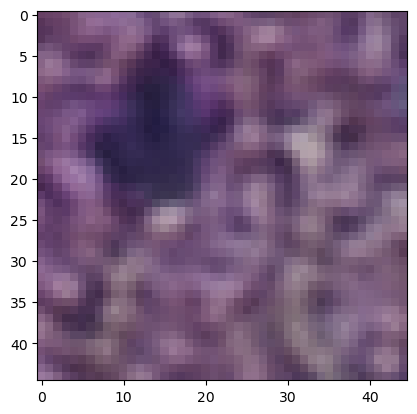

In [9]:
gen = img.generate_spot_crops(adata, spot_scale=0.5, as_array=True, squeeze=True)
dic = next(gen)
image = dic["image"]
plt.imshow(image)

Passing `False` to the argument `as_array` returns a
`squidpy.im.ImageContainer`.


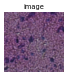

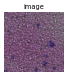

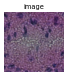

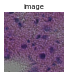

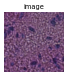

In [10]:
gen = img.generate_spot_crops(adata, spot_scale=2, as_array=False, squeeze=True)
for _ in range(5):
    next(gen).show(figsize=(2, 2), dpi=40)

If `return_obs = True`, yields a `tuple` (cropped image, `obs_name`).
Otherwise, yields just the crops. The type of the crops depends on
`as_array` and the number of dimensions on `squeeze`. Such generator
could be used downstream in machine learning applications, where the
class label as well as the image is needed.


Text(0.5, 1.0, 'AAAGACCCAAGTCGCG-1')

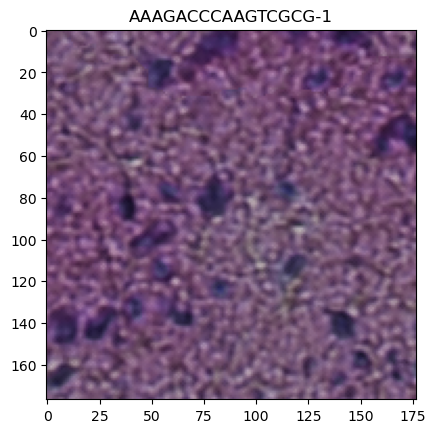

In [11]:
gen = img.generate_spot_crops(
    adata, spot_scale=2, as_array="image", squeeze=True, return_obs=True
)
image, obs_name = next(gen)
plt.imshow(image)
plt.title(obs_name)